#Preparación de los datos

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from itertools import chain
from google.colab import files

"""Primero que nada, debido a que en lugar de usar "," como separador, se estan usando ";" y esto hace que pandas no lea correctamente el formato.
Corrigo el formato del archivo para poder usar pandas sin problemas"""

def correct_format(file_source: str, new_file_route: str):
    #File_source es la ruta del archivo original que necesito corregir y new_file_route la ruta del archivo que voy a estar usando
    #Decidí hacerlo a modo general para que pueda serme útil en futuros proyectos
    with open(file_source, 'r') as file:
        raw_data = file.read()
        right_format_data = raw_data.replace(";",",")
    with open(new_file_route, 'w') as file:
        file.write(right_format_data)

correct_format('/content/drive/MyDrive/Colab Notebooks/Challenge-Federico Arias Ceci (DBLandIT)/student-mat.csv', 'to_use.csv')

data = pd.read_csv('to_use.csv')

data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


Hago un primer vistazo al formato de los datos y algunos datos estádisticos básicos, que pueden ser útiles más adelante.

# Definición de funciones

Usaré la siguiente celda para definirme funciones útiles para el armado dinámico de gráficos. (Son varios los casos en los que, fue hasta después de definir las funciónes, que descubrí que existían implementaciónes ya incluidas en las librerias que estoy usnando para resolver los mismos "problemas").






In [ ]:

"""Defino una funcion que me permite generar histogramas (para analizar la distribución de notas en distintos grupos)
a partir del dataset"""
"""Agrego la posibilidad de excluir datos que cumplan con cierta condición que puede ser problematica
(como tener una nota igual a 0), y permito solapar varios histogramas para compararlos"""

def G3_histograph_view(dataset: pd.DataFrame, exclude: dict[str:list] = None, **kwargs: dict[str:list]):
    #El parámetro exclude permite excluir grupos que cumplan con cierta condición para un parámetro dado.
    #Se pueden solapar tantos histgramas como se deseen para compararlos. La visulización es en porcentaje para facilitar la comparación.
    to_plot = []
    if exclude is not None:
        for key in exclude:
            dataset_groups = dataset.groupby(key)
            for i in range(len(exclude[key])):
                filtered_dataset = pd.concat([group for name, group in dataset_groups if name != exclude[key][i]])
                dataset = filtered_dataset
    for key, values in kwargs.items():
        Label_names: list = values
        for i in range(len(values)):
            to_plot.append(dataset[dataset[key] == values[i]]['G3'].to_list())
    plt.hist(to_plot, bins=range(0, 21), edgecolor='black', density=True, color = "#1f77b4")
    plt.xlabel('Grade')
    plt.ylabel('Density')
    plt.title('G3 distribution')
    plt.legend(Label_names)
    plt.xticks(np.arange(min(list(chain.from_iterable(to_plot))),max((list(chain.from_iterable(to_plot)))),1))

#G3_histograph_view(data, exclude={'G3':[0]}, school=["MS", "GP"])
#plt.gca().set_title('G3 by school without zeros')
#plt.show()

"""Debido a que la exclusion de grupos "problematicos" puede ser un problema recurrente, defino una función que me permite realizar
dicho filtrado para facilitar el trabajo más adelante"""

def exclude_group(dataset: pd.DataFrame, **exclude):
    for key in exclude:
            dataset_groups = dataset.groupby(key)
            for i in range(len(exclude[key])):
                filtered_dataset = pd.concat([group for name, group in dataset_groups if name != exclude[key][i]])
    return filtered_dataset
#Esta función quedó bastante obsoleta en la medida que empecé a usar el método query, que es central en pandas, pero no recordaba al momento de empezar el challege


"""Dejó escrita la sintaxis con la que estare trabajando para tomar medias en los distintos grupos"""
media_by_school = data.groupby("school")["G3"].mean()
media_by_age = data.groupby("age")["G3"].mean()
media_by_failures = data.groupby("failures")["G3"].mean()

"""Defino una función que me permite hacer gráficos de barras para el valor medio del G3 en función de un atributo"""
def bar_plot_media_by_group(dataset: pd.DataFrame, atribute: str, size):
    grouped_data = dataset.groupby(atribute)
    plotting_list: list = []
    for value in grouped_data.groups.keys():
        mean_value = grouped_data.get_group(value)["G3"].mean()
        plotting_list.append([value,mean_value])
    categories, values = [item[0] for item in plotting_list], [item[1] for item in plotting_list]
    # Graficar
    plt.figure(figsize=size)
    plt.bar(categories,values, color= "#1f77b4")
    plt.xlabel(atribute)
    plt.ylabel('Median Grade')
    plt.title(f'Median G3 by {atribute}')


"""Defino una función que me permite hacer gráficos de dispersión para el valor medio del G3 en función de un atributo"""
def scatter_plot_media_by_group(dataset: pd.DataFrame, atribute: str, size):
    grouped_data = dataset.groupby(atribute)
    plotting_list: list = []
    for value in grouped_data.groups.keys():
        mean_value = grouped_data.get_group(value)["G3"].mean()
        plotting_list.append([value,mean_value])
    categories, values = [item[0] for item in plotting_list], [item[1] for item in plotting_list]
    # Graficar
    plt.figure(figsize=size)
    plt.scatter(categories,values)
    plt.xlabel(atribute)
    plt.ylabel('Median Grade')
    plt.title(f'Median G3 by {atribute}')


"""En este punto encontre un montón de métodos de visulaización sobre los dataframe que me hacen más fácil la tarea,
por lo que voy a cambiar el enfoque"""
def percentages_matches(dataset: pd.DataFrame, group:str, condition):
    percentage_of_matches = dataset.get(group).where(dataset.get(group) == condition).count()*100/395
    return(percentage_of_matches)

def percentage_of_integrants_plot(dataset: pd.DataFrame, category: str, size):
    labels = []
    sizes = []
    for subgroup in dataset.groupby(category).groups.keys():
        subset = dataset[dataset[category] == subgroup]
        count = len(subset)
        percentage = (count/len(dataset)) * 100
        labels.append(f'{subgroup} ({percentage:.2f})%')
        sizes.append(percentage)
    # Crear el gráfico de torta
    plt.figure(figsize = size)
    plt.pie(sizes, pctdistance = 0.5, startangle=90, colors= plt.cm.viridis(np.linspace(0, 1, len(labels))))
    plt.legend(labels, loc='upper left', bbox_to_anchor=(0.0, 1), bbox_transform=plt.gcf().transFigure)
    plt.axis('equal')
    plt.title(f'Percentage of integrants by {category}')

#percentage_of_integrants_plot(data, 'Medu')
#plt.show()


"""Defino una función para armar la matriz de corelación entre las variables que desee"""

def correlation_matrix_selected_variables(dataset: pd.DataFrame, selected_variables: list[str], values: bool,size):
    subset_df = dataset[selected_variables]
    correlation_matrix = subset_df.corr()
    plt.figure(figsize=size)
    sns.heatmap(correlation_matrix, annot=values, cmap='coolwarm', center=0)
    plt.title(f'Correlation matrix for {selected_variables}')

"""Defino una función que me permite traducir los datos categóricos en números, lo que me va a facilitar los scater plots
así como la busqueda de correlaciones entre este tipo de variables"""
def categoria_a_numeros(dataset, categorical):
  out_dataset = dataset.copy()
  if out_dataset[categorical].dtype == object:
    groups = list(out_dataset.groupby(categorical).groups.keys())
    j = 0
    while j<len(groups):
        key = groups[j]
        for i in range(0,out_dataset.shape[0]):
          if out_dataset[categorical][i] == key:
            out_dataset.loc[i,categorical] = j
        j +=1
    return out_dataset

"""Defino una función que me permite hacer un scatter plot de los datos en función de alguna otra variable y me permite colorear los
puntos en relación a alguna categoría"""
def scatter_plot_G3(dataset: pd.DataFrame, atribute: str, categorical: str):
    if dataset[categorical].dtype == object:
      category = categoria_a_numeros(dataset, categorical)[categorical]
    else:
      category = dataset[categorical]
    variable = dataset[atribute]
    G3 = dataset['G3']

    plt.scatter(variable, G3, c=category)
    plt.xlabel(atribute)
    plt.ylabel('G3')
    plt.title(f'{atribute} vs G3')
    plt.show()
#También, a medida que avancé en el challenge, las herramientas aportadas por seaborn fueron mucho más eficientes para generar este tipo de gráfico

"""Aprovecho seaborn para armar de manera más sencilla los scatterplots"""
def sns_plots(dataset: pd.DataFrame, xvar, yvar, huev, size):
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=size)

  sns.scatterplot(data=dataset, x=xvar, y=yvar, hue=huev, alpha=0.5, ax =axes[0])
  axes[0].set_xlabel(xvar)
  axes[0].set_ylabel(yvar)
  axes[0].set_title(f'{xvar} vs {yvar}, grouping by {huev}')

  sns.kdeplot(data=dataset, x=xvar, y=yvar, hue=huev, alpha=0.5, fill = True, ax = axes[1])
  axes[1].set_xlabel(xvar)
  axes[1].set_ylabel(yvar)
  axes[1].set_title(f'{xvar} vs {yvar}, grouping by {huev}')

#Pequeños test de las funciones armadas

#correlation_matrix_selected_variables(data, selected_variables=['age','failures','G3'])
#plt.show()

#G3_histograph_view(data, failures=[0,1,2,3,4])
#bar_plot_media_by_group(exclude_group(data, Medu=[0]), "Medu")


#hist1 = data.hist(bins=30, column="G3", by="school")
#plt.show()

#plot = media_by_group(exclude_group(data, age=[20]), 'age').plot(y="G3 media", x="age", kind="line")
#plt.show()


#percentage_of_recursants = data.get('failures').where(data.get('failures') != 0).count()*100/395

#print(f'There are {percentage_of_recursants}% of recursants')


'Pequeños test de las funciones'

# Análisis de datos y plots

## Matriz de correlación

Primero que nada vamos a hechar la matriz de correlación de las variables numéricas. Si nos centramos en la fila correspondiente a G3, podemos ver que las únicas variables que guardan una correlación fuerte son G1 y G2. Adicionalmente, la educación de los padres, la cantidad de fracasos anteriores y la edad también parecen guardar cierta corrleación, aunque más débil; ahondaremos en estas variables.

<ipython-input-3-52689d8d96ca>:106: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = subset_df.corr()


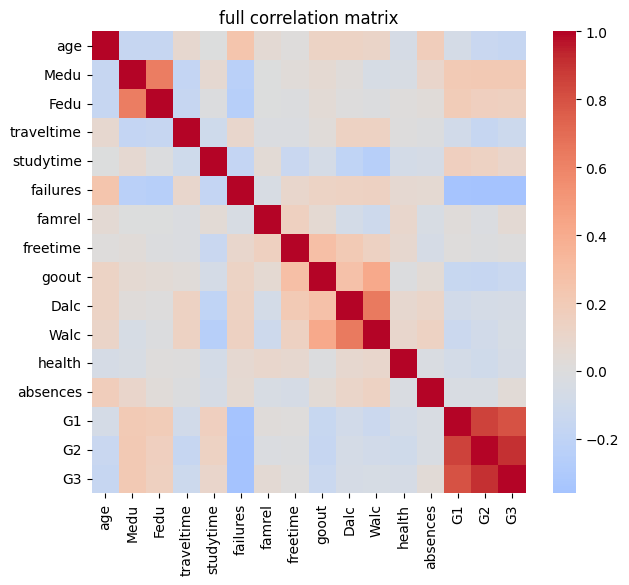

In [ ]:
"""genero la matriz de correlación lineal para todas las variables que no son categoricas.
Por simplicidad paso como parámetro todas las variables del dataframe sabiendo que se eliminarán de este análisis aquellas que son categoricas"""

correlation_matrix_selected_variables(data, selected_variables=data.columns.tolist(), values = False, size=(7,6))
plt.gca().set_title("full correlation matrix")
plt.show()

Vale la pena aclarar que esta matriz sólo nos da una idea de fuerza de las correlaciones ***lineales***. Es un punto de partida, pero no solo nos estamos perdiendo de ver otro tipo funcional de correlación, sino tambien estamos perdiendonos de ver la interacción conjunta de varias variables con G3. Existen algunos datos "problematicos" que pueden afectar estos resultados; en breve lo veremos.

## Relaciones con G1 y G2

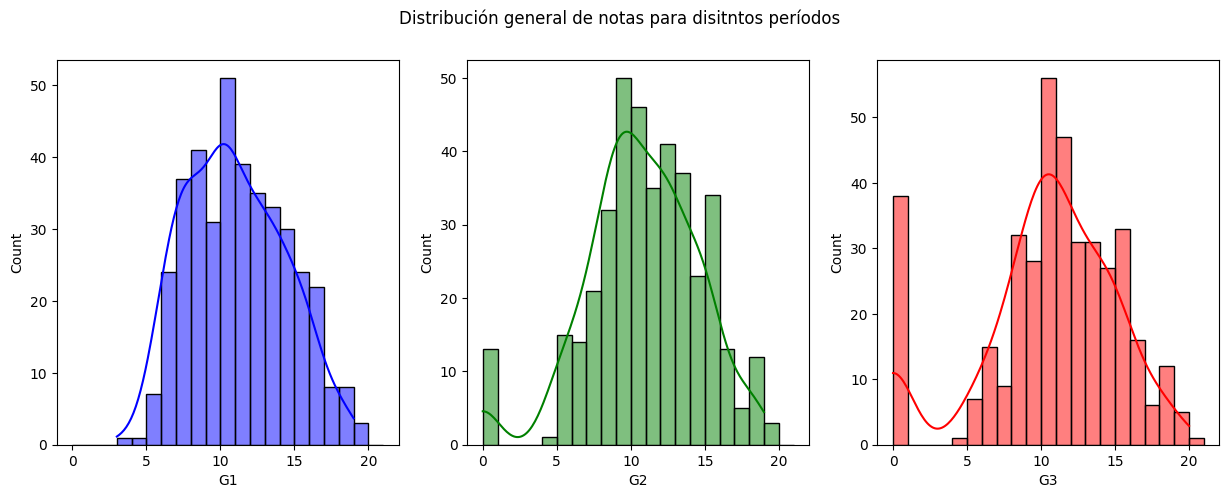

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
sns.histplot(data=data, x='G1', bins=21, kde=True, color='blue', ax=axes[0], binrange=(0, 21))
sns.histplot(data=data, x='G2', bins=21, kde=True, color='green', ax=axes[1],binrange=(0, 21))
sns.histplot(data=data, x='G3', bins=21, kde=True, color='red', ax=axes[2],binrange=(0, 21))
plt.suptitle('Distribución general de notas para disitntos períodos')
plt.show()

deserciones1 = percentages_matches(data, 'G2', condition = 0)*395/100
deserciones2 = percentages_matches(data, 'G3',condition = 0)*395/100 - deserciones1

Si interpretamos que los valores igaules a cero para las notas corresponden a abandonos de cursada, se puede ver que a medida que avanza el curso, la cantidad de deserciones crece rápido, en especial entre los últimos 2 períodos. Sin embargo, quitando estos casos la distribución sigue siendo similar alrededor del valor central.
De el primer al segundo período hubo 18 deserciones y del segundo al terecero 25 más.




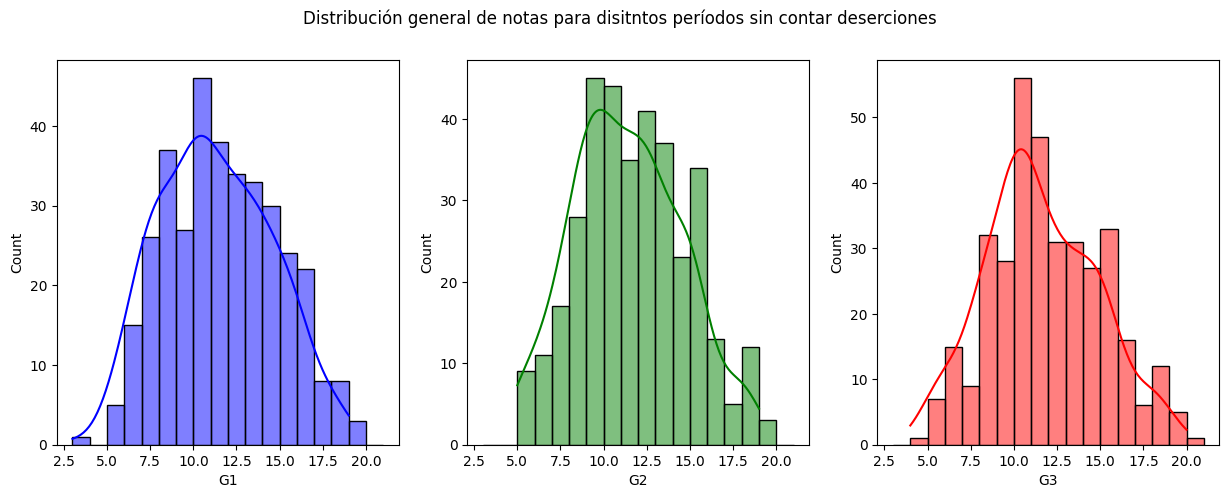

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
sns.histplot(data=exclude_group(data, G2=[0] , G3=[0]), x='G1', bins=18, kde=True, color='blue', ax=axes[0], binrange=(3, 21))
sns.histplot(data=exclude_group(data, G2=[0] , G3=[0]), x='G2', bins=18, kde=True, color='green', ax=axes[1],binrange=(3, 21))
sns.histplot(data=exclude_group(data, G2=[0] , G3=[0]), x='G3', bins=18, kde=True, color='red', ax=axes[2],binrange=(3, 21))
plt.suptitle('Distribución general de notas para disitntos períodos sin contar deserciones')
plt.show()



Aca podemos ver de forma más clara la distribución alrededor del valor central quitando los ceros, que parece estrecharse hacia el último período.

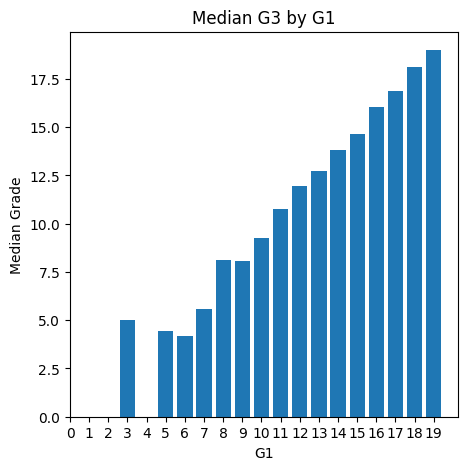

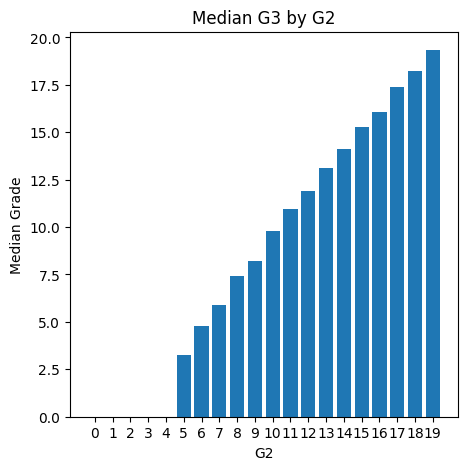

In [ ]:
bar_plot_media_by_group(data, atribute='G1', size=(5,5))
plt.gca().set_xticks(np.arange(0,20,1))
bar_plot_media_by_group(data, atribute='G2', size=(5,5))
plt.gca().set_xticks(np.arange(0,20,1))
plt.show()

Estos gráficos dan cuenta de la fuerte relación lineal antes hayada entre G1, G2 y G3. Se puede ver que a mejores notas en los primeros períodos, los alumnos tienen un mejor desempeño en períodos posteriores. Se podría hacer una regresión lineal para hayar el valor de la pendiente de la recta que mejor ajusta estos datos.

## Desempeño de recursantes

Un grupo interesante a analizar es el grupo de la gente que no está tomando el curso por primera vez. Primero, veamos que tan grande es este grupo.

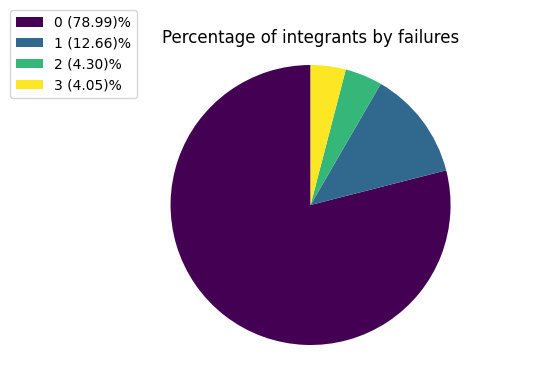

In [ ]:
percentage_of_integrants_plot(data, 'failures', size = (6,4))

Un 21% de integrantes son recursantes.

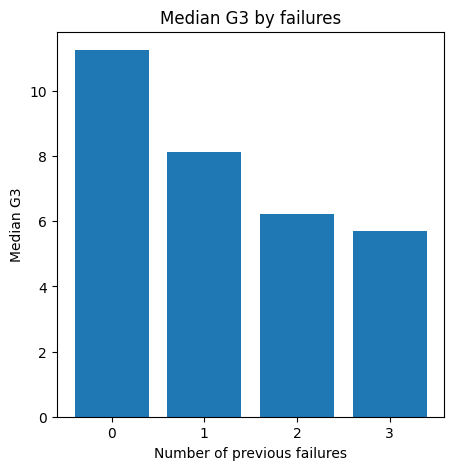

In [ ]:
bar_plot_media_by_group(data, atribute='failures',size = (5,5))
plt.gca().set_ylabel('Median G3')
plt.gca().set_xlabel('Number of previous failures')
plt.gca().set_xticks([0,1,2,3])
plt.show()

Nuevamente tenemos un gráfico que da cuenta de la correlación negativa que figuraba en la matriz de correlación. Es interesante notar que, las personas que estan retomando el curso no tienen, en promedio, un mejor desempeño que aquellas que lo están tomando por primera vez.

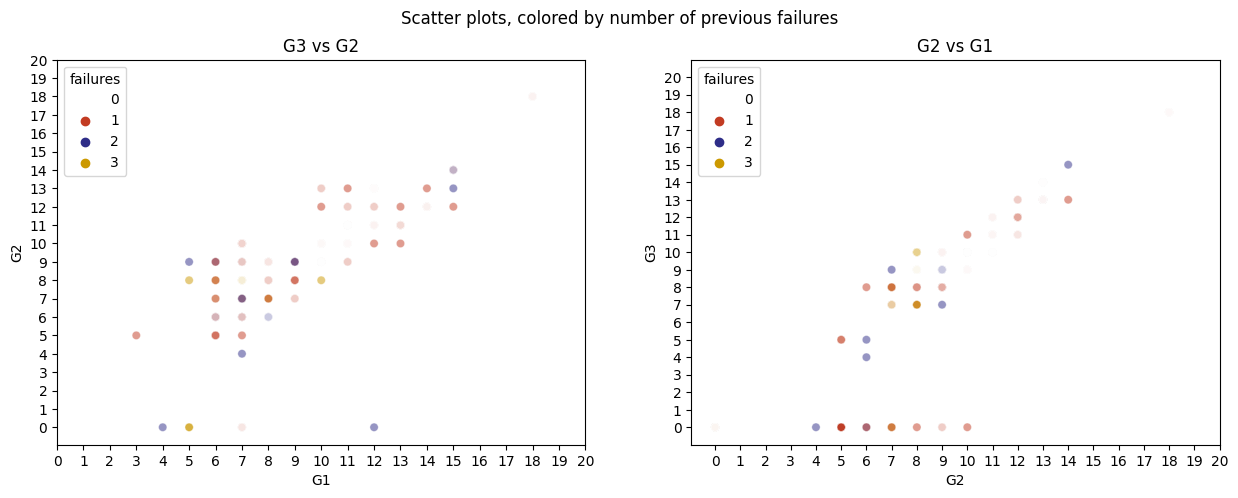

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
nueva_paleta = ['#ffffff00','#c23b22', '#2e2d88', '#cc9900']
"""Tomé la desición de pintar los datos de no recursnartes de blanco para que se haga más sencilla la visualización de algún
posible cluster, ya que son muchos los datos superpuestos."""

sns.scatterplot(data=data, x='G1', y='G2', hue='failures', alpha=0.5, palette=nueva_paleta, ax=axes[0])
plt.xlabel('G1')
plt.ylabel('G2')

sns.scatterplot(data=data, x='G2', y='G3', hue='failures', alpha=0.5, palette=nueva_paleta, ax=axes[1])
plt.xlabel('G2')
plt.ylabel('G3')


axes[1].set_xticks(np.arange(0, 21, 1))
axes[1].set_yticks(np.arange(0, 21, 1))
axes[1].set_title('G2 vs G1')

axes[0].set_xticks(np.arange(0, 21, 1))
axes[0].set_yticks(np.arange(0, 21, 1))
axes[0].set_title('G3 vs G2')

plt.suptitle('Scatter plots, colored by number of previous failures')
plt.show()


Intente hacer un "cluster" de los datos, para poder visualizar la fluctuación de la distribución de las notas de los chicos que se encuentran recursando. No se puede apreciar en ninguno de los dos casos una agrupación muy marcada de los datos, pero llama la atennción la cantidad de ceros para 'G3' que corresponden a chicos en esta situación. Veamos que porcentaje de chicos que estan recursando terminan el último período con 0 y comparemoslo con el mismo hecho para los nuevos ingresantes.

Consideraré que los 0 corresponden a abandono del curso.

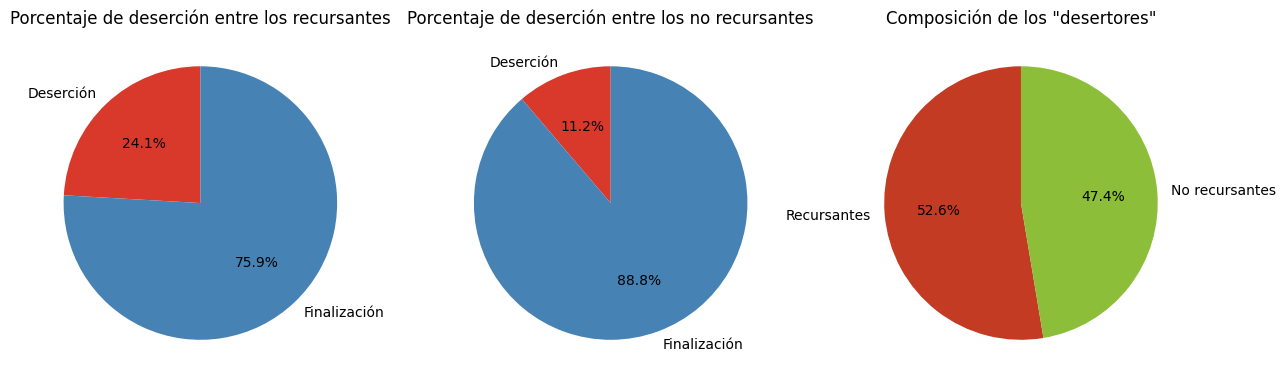

In [ ]:
datos_recursantes = exclude_group(data, failures = [0])
porcentaje_desaprobados_r = datos_recursantes.get('G3').where(data.get('G3') == 0).count()*100/len(datos_recursantes)
porcentaje_aprobados_r = 100 - porcentaje_desaprobados_r
toplot_r = [porcentaje_desaprobados_r,porcentaje_aprobados_r]

datos_no_recursnates = exclude_group(data, failures = [1,2,3])
porcentaje_desaprobados_nr = data.get('G3').where(data.get('G3') == 0).count()*100/len(data)
porcentaje_aprobados_nr = 100 - porcentaje_desaprobados_r
toplot_nr = [porcentaje_desaprobados_nr,porcentaje_aprobados_nr]

datos_desaprobados = data.query("G3 == 0")
porcentaje_recursantes = datos_desaprobados.get('failures').where(data.get('failures') != 0).count()*100/len(datos_desaprobados)
porcentaje_no_recursantes = 100 - porcentaje_recursantes
toplot_composicion_desap = [porcentaje_recursantes, porcentaje_no_recursantes]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
axes[0].pie(toplot_r, labels=['Deserción','Finalización'], autopct='%1.1f%%', startangle=90, colors=['#d8392b','#4682b4'])
axes[0].set_title('Porcentaje de deserción entre los recursantes')

axes[1].pie(toplot_nr, labels=['Deserción','Finalización'], autopct='%1.1f%%', startangle=90, colors=['#d8392b','#4682b4'])
axes[1].set_title('Porcentaje de deserción entre los no recursantes')

axes[2].pie(toplot_composicion_desap, labels=['Recursantes','No recursantes'], autopct='%1.1f%%', startangle=90, colors=['#c23b22','#8dbe3a'])
axes[2].set_title('Composición de los "desertores"')
plt.show()



Estos graficos dan cuenta que el desempeño de aquellos que deben de tomar el curso más de una vez, no necesariamente es mejor en las subsiguientes intentos. Por el contrario, si lo están recursando, tienden a tener que tomarlo más de una vez más.

## Desempeño en relación a la edad

Otra de las variables que parecen tener mayor correlación con el desempeño es la edad. Hagamos un análisis similar al anterior.

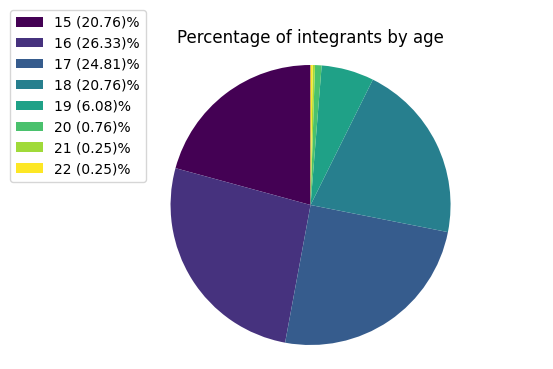

In [ ]:
percentage_of_integrants_plot(data, 'age', size = (6,4))
number_of20 = data.get('age').where(data.get('age') == 20).count()

La mayoría de los alumnos son menores a 18 años. De hecho son solo 3 los estudiantes que tienen 20 años, uno de 21 y oto más con 22. Vamos entonces a ver la media en función de la edad, filtrando los datos de personas mayores de 20 años ya que no son represnetativos.

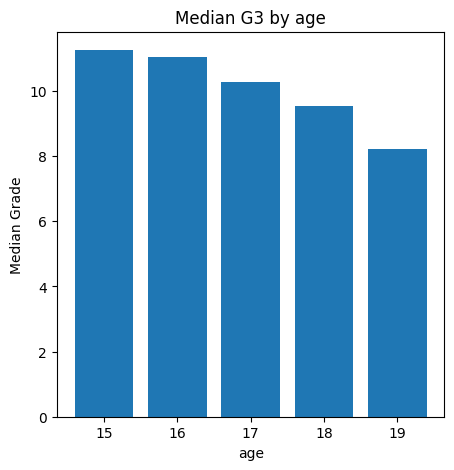

El coeficiente de correlación para los datos sin filtrar es de -0.162
La desviación estándard para los datos sin filtrar es de 4.581
El coeficiente de correlación para los datos filtrados es de -0.178
La desviación estándard para los datos filtrados es de 4.583


In [ ]:
to_plot = data.query("age < 20")
bar_plot_media_by_group(to_plot, atribute='age', size = (5,5))

plt.show()

correlación_sin_filtrado = data['age'].corr(data['G3'])
correlación_filtrada = to_plot['age'].corr(to_plot['G3'])

print(f"El coeficiente de correlación para los datos sin filtrar es de {correlación_sin_filtrado:.3f}")
print(f"La desviación estándard para los datos sin filtrar es de {data['G3'].std():.3f}")
print(f"El coeficiente de correlación para los datos filtrados es de {correlación_filtrada:.3f}")
print(f"La desviación estándard para los datos filtrados es de {to_plot['G3'].std():.3f}")

La correlación sigue siendo poca para los datos filtrados, sin embargo se ve una tendencia a la baja en la media de las calificaciones para chicos de mayor edad.  La desviación estándard alrededor de la media es relativamente alta, esto seguro se relaciona con el valor chico para el coeficiente de correlación.

## Impacto de las relaciones familiares

Primero que nada, veamos como incide el máximo nivel educativo alcanzado por los padres en el desempeño de los alumnos.

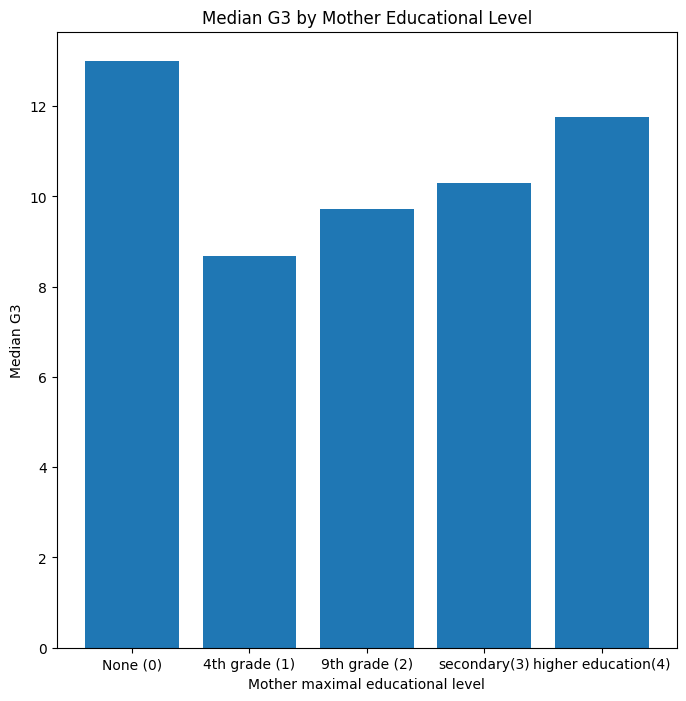

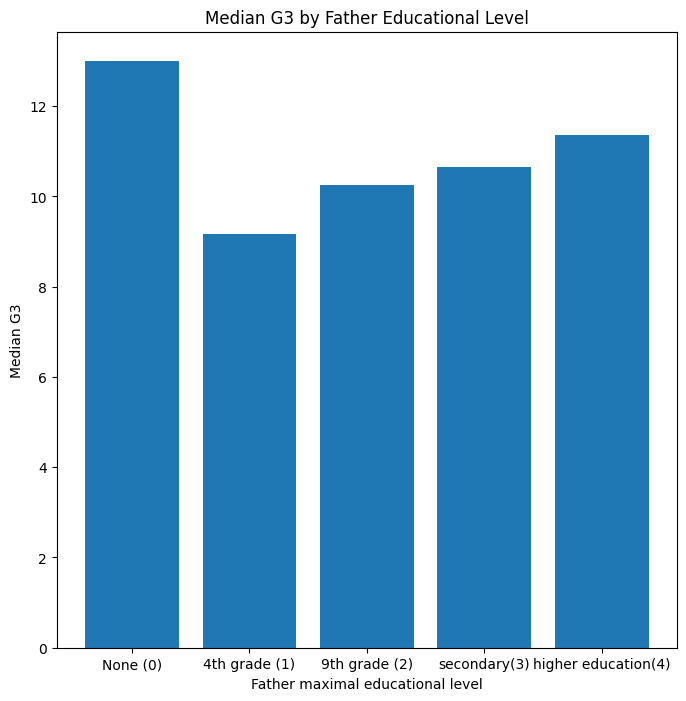

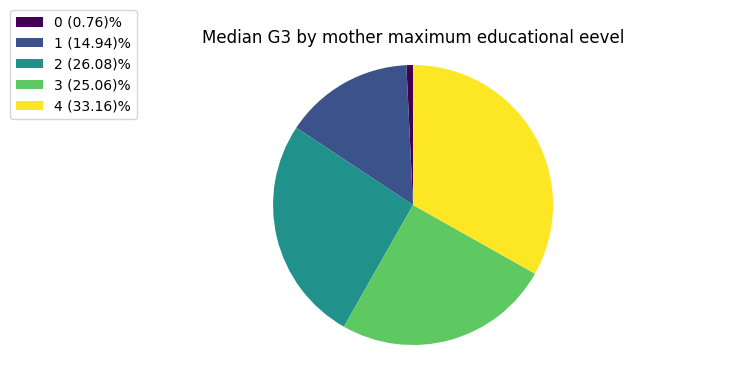

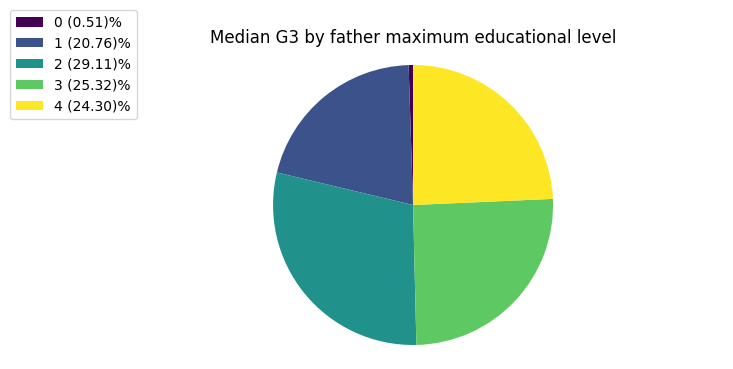

In [ ]:
bar_plot_media_by_group(data, atribute='Medu', size = (8,8))
plt.gca().set_title('Median G3 by Mother Educational Level')
plt.gca().set_xlabel('Mother maximal educational level')
plt.gca().set_ylabel('Median G3')
plt.gca().set_xticks([0,1,2,3,4],['None (0)','4th grade (1)','9th grade (2)','secondary(3)','higher education(4)'])
bar_plot_media_by_group(data, atribute='Fedu', size = (8,8))
plt.gca().set_title('Median G3 by Father Educational Level')
plt.gca().set_xlabel('Father maximal educational level')
plt.gca().set_ylabel('Median G3')
plt.gca().set_xticks([0,1,2,3,4],['None (0)','4th grade (1)','9th grade (2)','secondary(3)','higher education(4)'])

percentage_of_integrants_plot(data, 'Medu', size = (8,4))
plt.gca().set_title('Median G3 by mother maximum educational eevel')
percentage_of_integrants_plot(data, 'Fedu', size = (8,4))
plt.gca().set_title('Median G3 by father maximum educational level')

plt.show()

Nuevamente hay datos muy particulares; son solo 3 personas cuya madre no entro al sistema educativo y 2 personas cuyo padre se enceuntra en dicha situación. Si despreciamos estos datos, se puede ver que hay una incidencia positiva del nivel de estudio del padre/madre en la calificación media de los alumnos.

 Me parece interesante ver la influencia de ambas variables como un todo; por esto voy a ver que pasa con la media para G3 si la tomo en función de una nueva variable que sea el promedio del nivel educativo alcanzado por ambos padres.

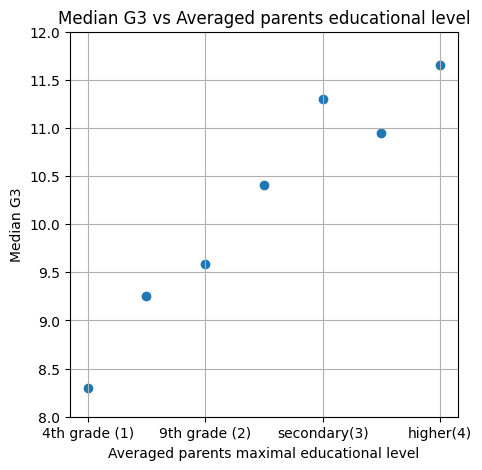

In [ ]:
average_edu = (data['Medu'] + data['Fedu'])/2
average_edu_data = data.copy()
average_edu_data['Averaged_education'] = average_edu
average_edu_data = average_edu_data.query("Medu > 0")
average_edu_data = average_edu_data.query("Fedu > 0")

scatter_plot_media_by_group(average_edu_data, 'Averaged_education', (5,5))
plt.gca().grid(True)
plt.gca().set_title('Median G3 vs Averaged parents educational level')
plt.gca().set_xlabel('Averaged parents maximal educational level')
plt.gca().set_xticks([1,2,3,4],['4th grade (1)','9th grade (2)','secondary(3)','higher(4)'])
plt.gca().set_ylabel('Median G3')
plt.gca().set_yticks(np.arange(8,12.5,0.5))

plt.show()


Se observa la misma relación positiva entre ambas variables; me parece además que esta forma de considerar los dos datos al unisono puede llegar a ser un poco más "eficiente" a la hora de tratar de realizar modelos predictivos.


### Relaciónes entre el nivel educativo de los padres, y otros aspectos de la situación familiar.

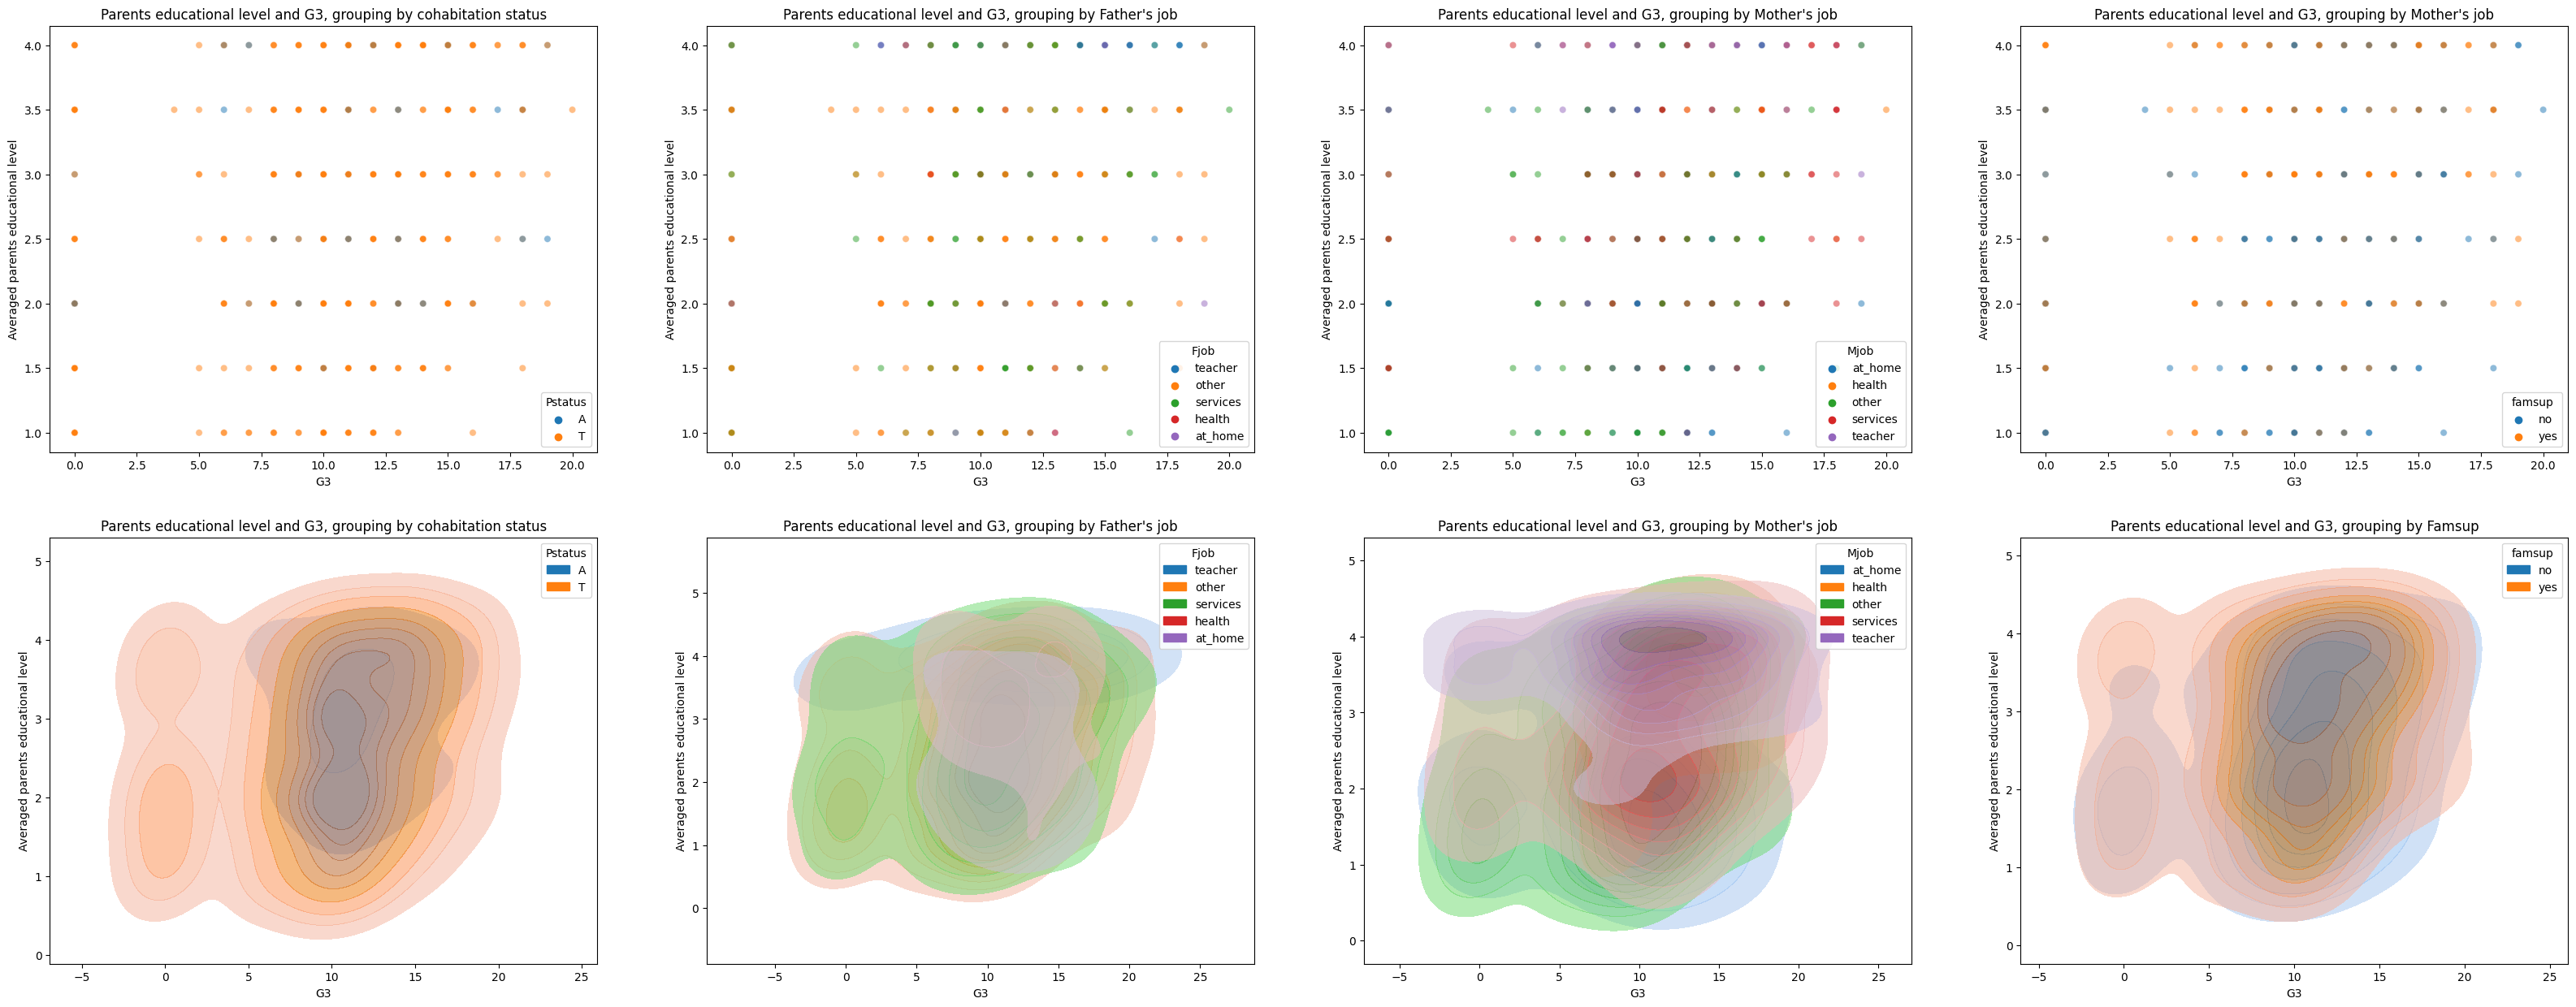

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(40, 15))

#1
sns.scatterplot(data=average_edu_data, x='G3', y='Averaged_education', hue='Pstatus', alpha=0.5, ax = axes[0,0])
axes[0,0].set_xlabel('G3')
axes[0,0].set_ylabel('Averaged parents educational level')
axes[0,0].set_title('Parents educational level and G3, grouping by cohabitation status')

#2
sns.kdeplot(data=average_edu_data, x='G3', y='Averaged_education', hue='Pstatus', alpha=0.5, fill = True, ax = axes[1,0])
axes[1,0].set_xlabel('G3')
axes[1,0].set_ylabel('Averaged parents educational level')
axes[1,0].set_title('Parents educational level and G3, grouping by cohabitation status')

#3
sns.scatterplot(data=average_edu_data, x='G3', y='Averaged_education', hue='Fjob', alpha=0.5, ax = axes[0,1])
axes[0,1].set_xlabel('G3')
axes[0,1].set_ylabel('Averaged parents educational level')
axes[0,1].set_title('Parents educational level and G3, grouping by Father\'s job')

#4
sns.kdeplot(data=average_edu_data, x='G3', y='Averaged_education', hue='Fjob', alpha=0.5, fill=True, ax = axes[1,1])
axes[1,1].set_xlabel('G3')
axes[1,1].set_ylabel('Averaged parents educational level')
axes[1,1].set_title('Parents educational level and G3, grouping by Father\'s job')

#5
sns.scatterplot(data=average_edu_data, x='G3', y='Averaged_education', hue='Mjob', alpha=0.5, ax =axes[0,2])
axes[0,2].set_xlabel('G3')
axes[0,2].set_ylabel('Averaged parents educational level')
axes[0,2].set_title('Parents educational level and G3, grouping by Mother\'s job')

#6
sns.kdeplot(data=average_edu_data, x='G3', y='Averaged_education', hue='Mjob', alpha=0.5, fill = True, ax = axes[1,2])
axes[1,2].set_xlabel('G3')
axes[1,2].set_ylabel('Averaged parents educational level')
axes[1,2].set_title('Parents educational level and G3, grouping by family support')

#7
sns.scatterplot(data=average_edu_data, x='G3', y='Averaged_education', hue='famsup', alpha=0.5, ax =axes[0,3])
axes[0,3].set_xlabel('G3')
axes[0,3].set_ylabel('Averaged parents educational level')
axes[0,3].set_title('Parents educational level and G3, grouping by family support')

#8
sns.kdeplot(data=average_edu_data, x='G3', y='Averaged_education', hue='famsup', alpha=0.5, fill = True, ax = axes[1,3])
axes[1,3].set_xlabel('G3')
axes[1,3].set_ylabel('Averaged parents educational level')
axes[1,3].set_title('Parents educational level and G3, grouping by Famsup')

plt.show()

Primero que nada, hay que tener en cuenta que eliminamos los 5 datos correspondientes a las personas cuyo Padre o Madre no recibieron ningún tipo de educación.

Quise usar dos tipos distintos de gráficos ya que en conjunto permiten una mejor visualización de los distintos grupos. Algunos datos a destacar que saltan a la vista con esta forma de visualización son:

*   Todas aquellas personas que desaprobaron se encuentran conviviendo con los padres.
*   No hay muchos casos de padres/madres que se encuentren desempleados ("at_home").
*   La mayoria de los padres/madres docentes se encuentran en familias donde el "nivel educativo promedio" es máximo (ambos padres tienen nivel superior de formación).
*   Parece que aquellos que tienen trabajos catalogados como "otros" corresponden a las personas con menor nivel educativo máximo.

# Notas finales


Existen datos de 32 variables distintas, el análisis anterior se limitó a unas 9 de ellas. Por un lado, esto tiene que ver con la dificultad para hallar relaciones entre las demás variables y G3, y por otro, con una decisión personal de aplicar las herramientas de análisis de datos que tengo hasta el momento en la forma más representativa posible.

Hallar los valores de la media y desviación estándard de las calificaciónes para todas las variables es sencillo con las herramientas que ya estuve utilizando a lo largo del challenge. Intentar agrupar datos por estas categorías también lo es (***intentarlo***, ahora bien, por la composición del dataset, es difícil encontrar estas relaciones).


Con la función *bar_plot_media_by_group*, podemos armarnos todos los graficos de barra que queramos para comparar los valores medios de la variable objetibo ("G3") en los distintos grupos. Si quisieramos tomar la desviación estándar de cada grupo alrededor de su media es tan simple como aplicar el metodo *std.()* al objeto groupby deseado.

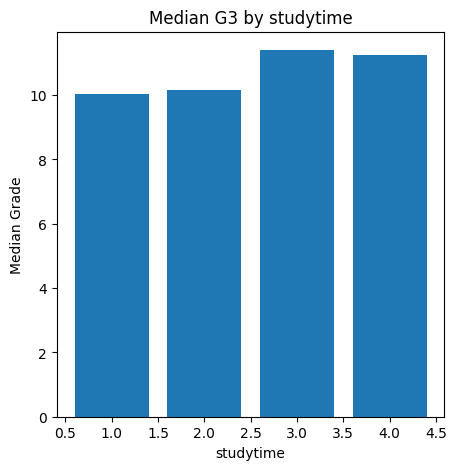

la desviación estandard para cada grupo es: 
 studytime
1    4.956311
2    4.217537
3    4.639504
4    5.281263
Name: G3, dtype: float64


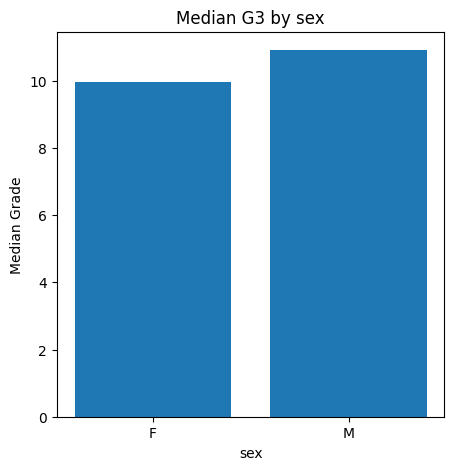

la desviación estandard para cada grupo es: 
 sex
F    4.622338
M    4.495297
Name: G3, dtype: float64


In [ ]:
bar_plot_media_by_group(data, atribute='studytime',size = (5,5))
std_by_studityme = data.groupby('studytime')['G3'].std()
plt.show()
print(f'la desviación estandard para cada grupo es: \n {std_by_studityme}')

bar_plot_media_by_group(data, atribute='sex',size = (5,5))
plt.show()
std_by_sex = data.groupby('sex')['G3'].std()
print(f'la desviación estandard para cada grupo es: \n {std_by_sex}')

Los gráficos de dispersión para intentar identificar grupos con caracterísitcas comunes también son fáciles de hacer con la función *sns_plots*. Sin embargo, se me hizo difícil encontrar las variables adecuadas para extraer información realmente útil de estos gráficos.




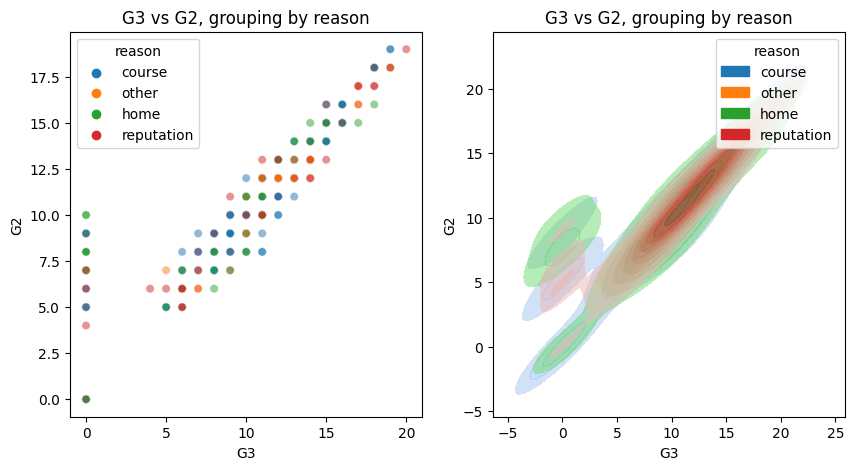

In [ ]:
sns_plots(data, xvar='G3', yvar='G2', huev='reason', size=(10,5))

En resumen, los métodos que hoy conozco para la exploración de datos están expuestos. Con estos métodos, las variables del dataset de las que pude extraer información más útil fueron analizadas; las relaciones con las demás variables, que no se encuentran expuestas en las secciones anteriores, no parecen ser tan relevantes (según los métodos de análisis que aquí expuse).